# NLP Theory & Application

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#df.describe(include='all')

In [4]:
df['length1'] = df['question1'].apply(len)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,length1
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76


In [6]:
description = df.drop(['id', 'qid1', 'qid2'], axis=1)
question1_column = df['question1'].head()
question2_column = df['question2'].head()

In [7]:
#merged_questions = pd.concat([question1_column, question2_column]).reset_index(drop=True)
isDuplicate_count = df['is_duplicate'].value_counts()

In [8]:
#merged_questions.columns = ['all_questions']
isDuplicate = isDuplicate_count[1]/(isDuplicate_count[0]+isDuplicate_count[1])

In [9]:
#merged_questions.columns
isDuplicate

0.36919785302629299

In [10]:
#merged_questions
isDuplicate_count

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [11]:
#merged_questions.unique()

In [12]:
q1 = df['question1'][3]
q2 = df['question2'][1]

Natural Language Processing

Transform question into a vector representing a 'Bag of Words' so that we can perform vector operations.

We can use Cosine similarity on the vectors made to determine similiarity.

$$
sim(A,B) = \cos({\theta}) = \frac{A \cdot B}{\| A \| \| B \|}
$$
-Use TF-ISF (Term Frequency - Inverse Sentence Frequency) to improve the model.

-Term Frequency - Importance of the term within that document.

$$
TF(s,t)= number \quad of \quad occurrences \quad of \quad term \quad t \quad in \quad sentence \quad s.
$$ 

Inverse Sentence Frequency - Importance of the term in the corpus(collection of sentences)

$$
ISF(t)= \log{ \left(\frac{S}{t}\right) }
$$ 

Term $ {x} $ within sentence $ {y} $
<br/>
$tf_{x,y}$ = frequency of ${x}$ in ${y}$
<br/>
$sf_{x}$ = number of sentences containing ${x}$
<br/>
${N}$ = total number of sentences
$$
w_{x,y} = tf_{x,y} \times \log\left(\frac{N}{sf_{x}}\right)
$$

<br/>

Reason for doing this is to determine the importance of the word in the entire collection not just the sentence.

In [13]:
q1 = pd.DataFrame(q1.split())

In [14]:
q1

,0
0,Why
1,am
2,I
3,mentally
4,very
5,lonely?
6,How
7,can
8,I
9,solve


In [15]:
q2 = pd.DataFrame(q2.split())

In [16]:
q2

,0
0,What
1,would
2,happen
3,if
4,the
5,Indian
6,government
7,stole
8,the
9,Kohinoor


In [17]:
#nltk.download_shell()

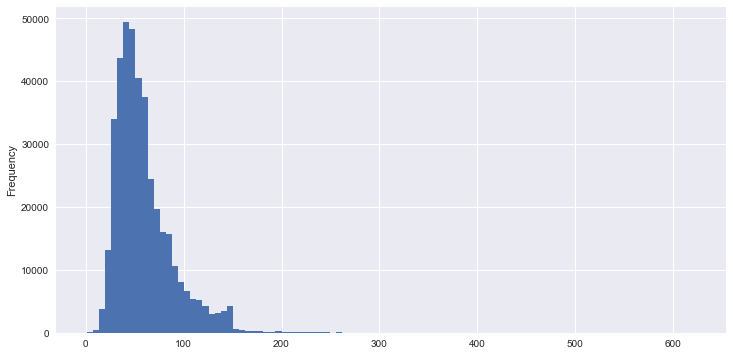

In [18]:
df['length1'].plot.hist(bins=100, figsize=(12,6), by='is_duplicate')

In [19]:
df['length1'].describe()

count    404290.000000
mean         59.536716
std          29.940641
min           1.000000
25%          39.000000
50%          52.000000
75%          72.000000
max         623.000000
Name: length1, dtype: float64

In [20]:
df[df['length1'] == 623]['question1'].iloc[0]

'Like everyone else (here in U.S), I work with a group of people I see and interact with every day. As a human rights advocate and Lesbian, my views are liberal and I by no means preach my beliefs in my work place. However, I want to know, when is it OK to state your opinions on an issue. For example, if someone mentions that their next door neighbor, who happens to be a 12 year old boy, was playing with dolls and that "this is going down the wrong road and he is strange/weird", is it OK for me to say that we shouldn\'t judge him for who he is? So confused... This just happened at lunch and I am very upset about it...'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b9afb70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1259b40b8>], dtype=object)

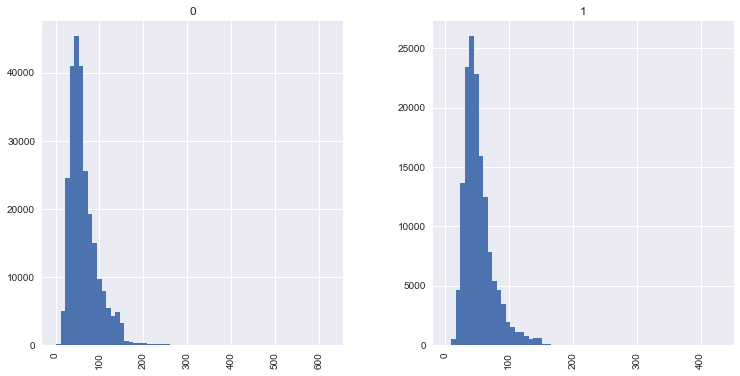

In [21]:
df.hist(column='length1', by='is_duplicate', bins=60, figsize=(12,6))

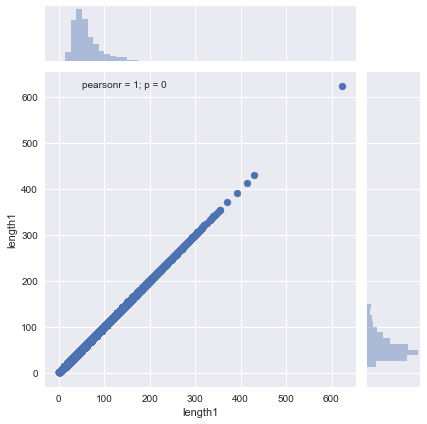

In [22]:
sns.jointplot(x='length1',y='length1',data=df,kind='scatter')

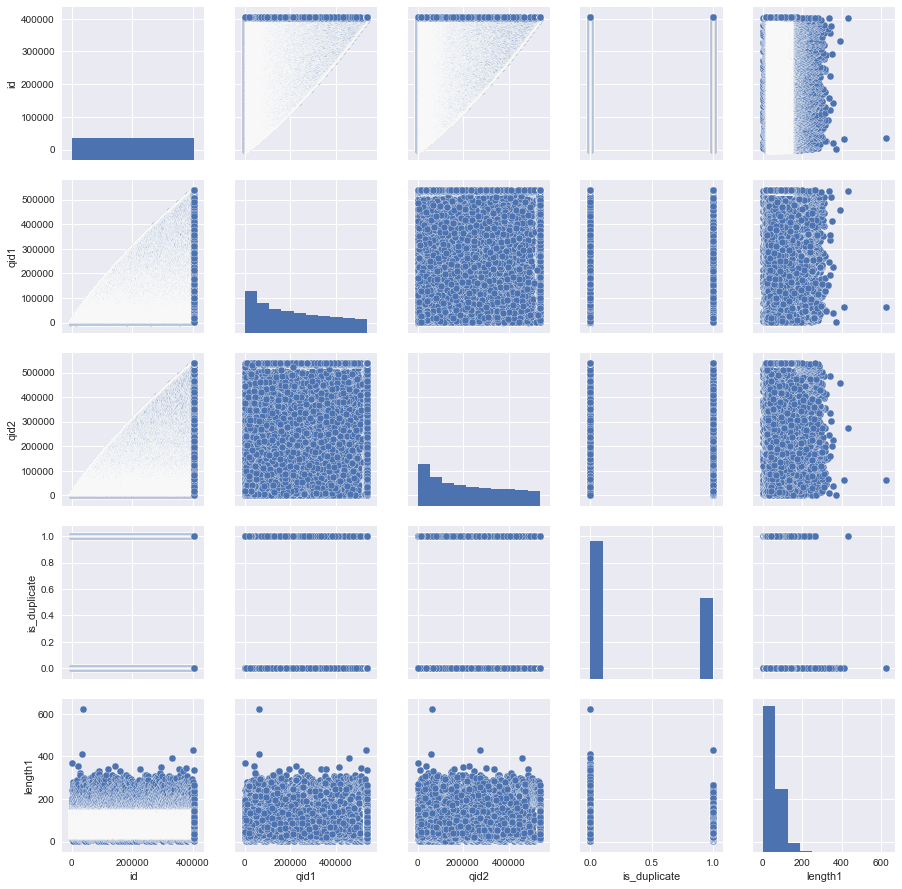

In [ ]:
sns.pairplot(df)